In [1]:
from langchain_openai import ChatOpenAI
from typing import TypedDict
from langgraph.graph import StateGraph, START, END
from dotenv import load_dotenv

In [2]:
load_dotenv()
model = ChatOpenAI()

In [3]:
class BlogState(TypedDict):
    title: str
    outline: str
    content: str
    rating: int
    

In [4]:
def create_outline(state:BlogState)->BlogState:
    #fetch title
    title = state['title']

    #call llm gen outline
    prompt = f"Generate a detailed outline for a blog on the given topic - {title}"
    outline = model.invoke(prompt)

    #update state
    state['outline'] = outline

    return state

In [5]:
def create_blog(state:BlogState)->BlogState:
    #fetch title and outline
    title = state['title']
    outline = state['outline']

    #call llm
    prompt = f"Write a detailed blog on the title - {title} using the following outlinte \n {outline}"
    content = model.invoke(prompt).content

    #update state
    state['content'] = content

    return state

In [6]:
def rating(state:BlogState)->BlogState:
    #fetch title, outline and content
    title = state['title']
    outline = state['outline']
    content = state['content']

    #call llm
    prompt = f"Rate my blog {content} on the topic - {title} on the basis of following outline - {outline} out of 15"
    rating = model.invoke(prompt).content

    state['rating'] = rating

    return state

In [7]:
def check_rating(state:BlogState)-> BlogState:
    #fetch rating
    rating = state['rating']
    if rating < 12:
        return "Fail"
    return "Pass"
    

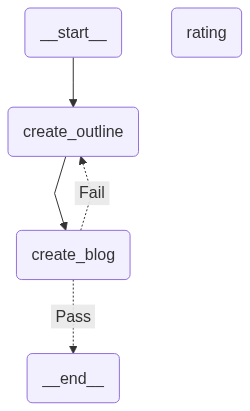

In [ ]:
graph = StateGraph(BlogState)

#Create nodes
graph.add_node('create_outline', create_outline)
graph.add_node('create_blog', create_blog)
graph.add_node('rating', rating)

#Create edges
graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline', 'create_blog')
graph.add_edge('create_blog', 'rating')
graph.add_conditional_edges('rating', check_rating,{"Pass":END, "Fail":'create_outline'} )

#compile graph
graph.compile()